In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the data

In [117]:

import pandas as pd

# Load the dataset into a pandas DataFrame
def load_dataset(zip_path):
    try:
        # Assuming the unzipped file is a csv
        data = pd.read_csv(zip_path)
        return data
    except Exception as e:
        print(f"An error occurred: {e}")

# Get dataset statistics
def get_dataset_stats(data):
    print("Dataset Statistics:")
    print(data.describe())

    print("\nNull Values:")
    print(data.isnull().sum())

    print("\nData Types:")
    print(data.dtypes)


zip_path = "/content/drive/MyDrive/projects/credit-risk-assessment/archive.zip"
data = load_dataset(zip_path)

if data is not None:
    get_dataset_stats(data)



Dataset Statistics:
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000           

In [118]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# EDA

##  Age:

1. Age distribution
1.   How do loan outcomes (default vs. full repayment) vary across different age groups
2.   Which loan purposes are most common within each age group?
3. what is top loan intent in each age bracket?




### Age Distribution

The average age is 27, and People older than 40 considered as outliers for this dataset.


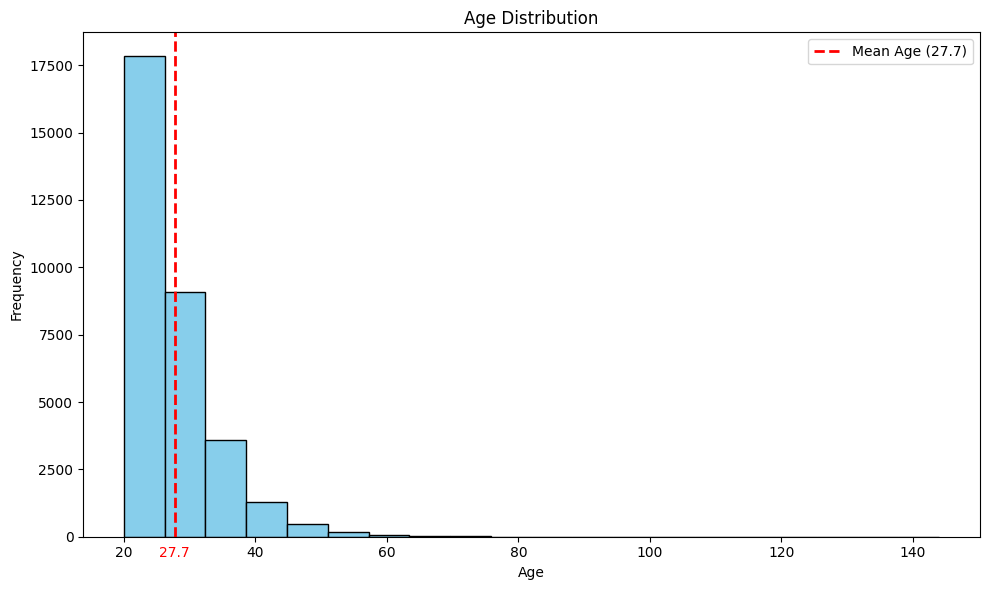

In [119]:
import matplotlib.pyplot as plt

mean_age = data['person_age'].mean()

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(
    data['person_age'],
    bins=20,
    color='skyblue',
    edgecolor='black'
)


plt.axvline(
    x=mean_age,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Mean Age ({mean_age:.1f})'
)


plt.text(
    mean_age,
    -max(counts)*0.02,
    f'{mean_age:.1f}',
    color='red',
    ha='center',
    va='top'
)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.legend()
plt.tight_layout()
plt.show()


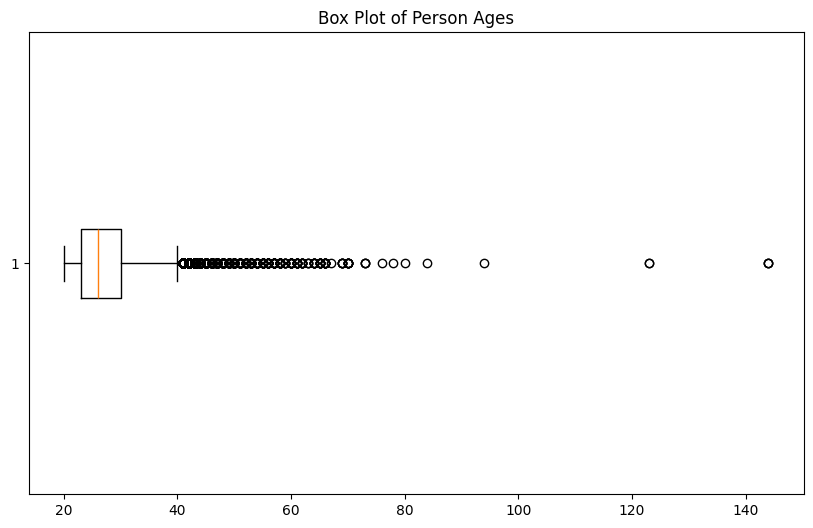

In [120]:
# Analyzing the average age present in the data and detecting the outliers.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.boxplot(data['person_age'], vert=False)
plt.title('Box Plot of Person Ages')
plt.show()

In [121]:
# Detect outliers using IQR (Interquartile Range) method
Q1 = data['person_age'].quantile(0.25)
Q3 = data['person_age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['person_age'] < lower_bound) | (data['person_age'] > upper_bound)]

# Get information of outlier people
print("Outlier People Information:")
print(outliers.head())

Outlier People Information:
       person_age  person_income person_home_ownership  person_emp_length  \
81            144         250000                  RENT                4.0   
183           144         200000              MORTGAGE                4.0   
575           123          80004                  RENT                2.0   
747           123          78000                  RENT                7.0   
29121          50         900000              MORTGAGE               11.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
81               VENTURE          C       4800          13.57            0   
183            EDUCATION          B       6000          11.86            0   
575            EDUCATION          B      20400          10.25            0   
747              VENTURE          B      20000            NaN            0   
29121  DEBTCONSOLIDATION          B      30000          12.69            0   

       loan_percent_income cb_person_def

In [122]:
outliers.person_age.min() , outliers.person_age.max()

(41, 144)

### How do loan outcomes (default vs. full repayment) vary across different age groups




<ipython-input-123-9bf53e89a2b4>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_group', 'loan_status'])


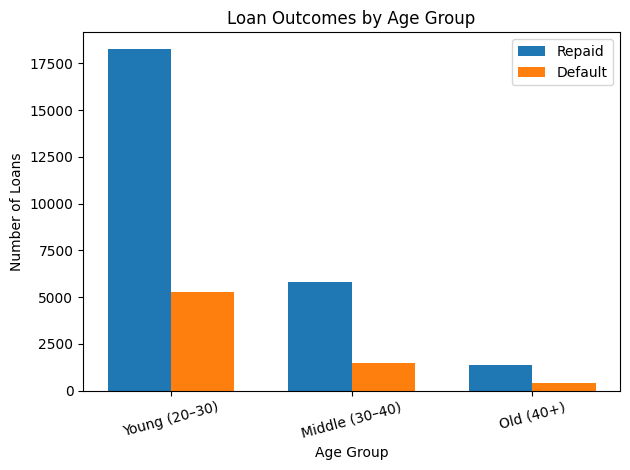

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


bins = [ 20, 30, 40, np.inf]
labels = [ 'Young (20–30)', 'Middle (30–40)', 'Old (40+)']


data['age_group'] = pd.cut(data['person_age'], bins=bins, labels=labels, right=False)

# Compute counts
loan_outcomes = (
    data
    .groupby(['age_group', 'loan_status'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={0: 'Repaid', 1: 'Default'})
)

# Plot
x = np.arange(len(loan_outcomes))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, loan_outcomes['Repaid'], width, label='Repaid')
ax.bar(x + width/2, loan_outcomes['Default'], width, label='Default')

# Labels and styling
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Loans')
ax.set_title('Loan Outcomes by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(loan_outcomes.index, rotation=15)
ax.legend()

plt.tight_layout()
plt.show();


### Which loan purposes are most common within each age group?


Young (20–30) --> EDUCATION


Middle (30–40) --> MEDICAL

Old (40+) --> PERSONAL

Loan Purpose Counts by Age Group:
loan_intent     DEBTCONSOLIDATION  EDUCATION  HOMEIMPROVEMENT  MEDICAL  \
age_group                                                                
Young (20–30)                3765       5032             2331     4297   
Middle (30–40)               1198       1158             1037     1414   
Old (40+)                     249        263              237      360   

loan_intent     PERSONAL  VENTURE  
age_group                          
Young (20–30)       3940     4143  
Middle (30–40)      1200     1301  
Old (40+)            381      275  

Most Common Loan Purpose per Age Group:
age_group
Young (20–30)     EDUCATION
Middle (30–40)      MEDICAL
Old (40+)          PERSONAL
dtype: object


<ipython-input-124-b178473d425c>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_group', 'loan_intent'])


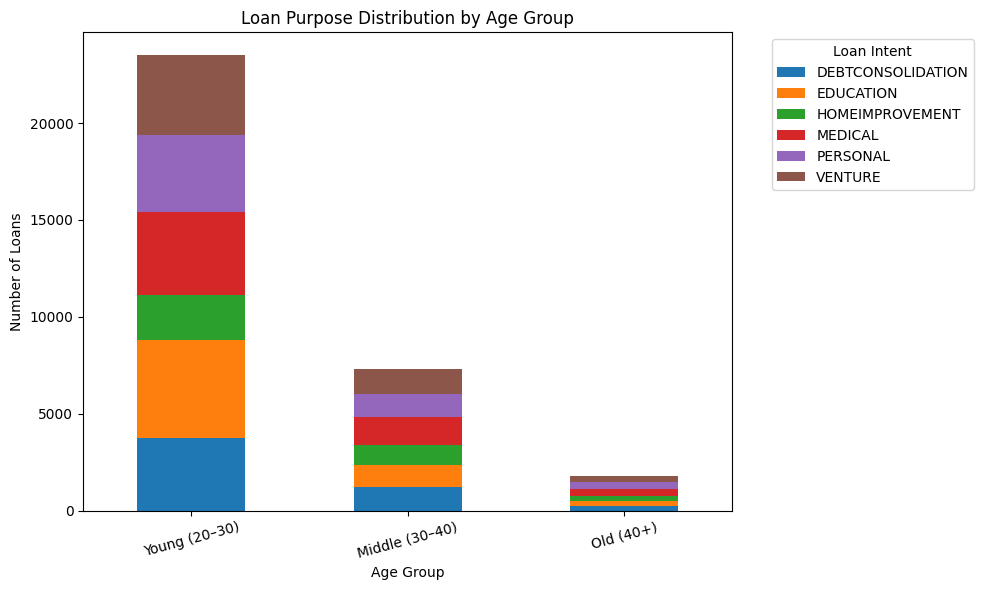

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


bins = [20, 30, 40, np.inf]
labels = ['Young (20–30)', 'Middle (30–40)', 'Old (40+)']
data['age_group'] = pd.cut(data['person_age'], bins=bins, labels=labels, right=False)

# Compute counts of loan purposes per age group
loan_purpose_counts = (
    data
    .groupby(['age_group', 'loan_intent'])
    .size()
    .unstack(fill_value=0)
)

print("Loan Purpose Counts by Age Group:")
print(loan_purpose_counts)

# 4. Identify the most common intent in each group
most_common = loan_purpose_counts.idxmax(axis=1)
print("\nMost Common Loan Purpose per Age Group:")
print(most_common)

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
loan_purpose_counts.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xlabel('Age Group')
plt.ylabel('Number of Loans')
plt.title('Loan Purpose Distribution by Age Group')
plt.xticks(rotation=15)
plt.legend(title='Loan Intent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### what is top loan intent in each age bracket?

In [125]:
import numpy as np
import pandas as pd



intent_by_age = (
    data
    .groupby(['age_group', 'loan_intent'])
    .size()
    .unstack(fill_value=0)
)


most_common_intent = intent_by_age.idxmax(axis=1)


print("Loan Intent Counts by Age Group:\n", intent_by_age, "\n")
print("Most Common Loan Intent per Age Group:\n", most_common_intent)


Loan Intent Counts by Age Group:
 loan_intent     DEBTCONSOLIDATION  EDUCATION  HOMEIMPROVEMENT  MEDICAL  \
age_group                                                                
Young (20–30)                3765       5032             2331     4297   
Middle (30–40)               1198       1158             1037     1414   
Old (40+)                     249        263              237      360   

loan_intent     PERSONAL  VENTURE  
age_group                          
Young (20–30)       3940     4143  
Middle (30–40)      1200     1301  
Old (40+)            381      275   

Most Common Loan Intent per Age Group:
 age_group
Young (20–30)     EDUCATION
Middle (30–40)      MEDICAL
Old (40+)          PERSONAL
dtype: object


<ipython-input-125-0e9069becb19>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_group', 'loan_intent'])


## House Ownership Status



*   What is the distibution of house ownership across the whole dataset?

*   What is the distibution of house ownership across different age group?

*   How many borrowers fall into each home-ownership category?
*  How do loan outcomes (default vs. full repayment) vary for each home-ownership category








### distibution of house ownership across the whole dataset


The most common house ownership status is rent

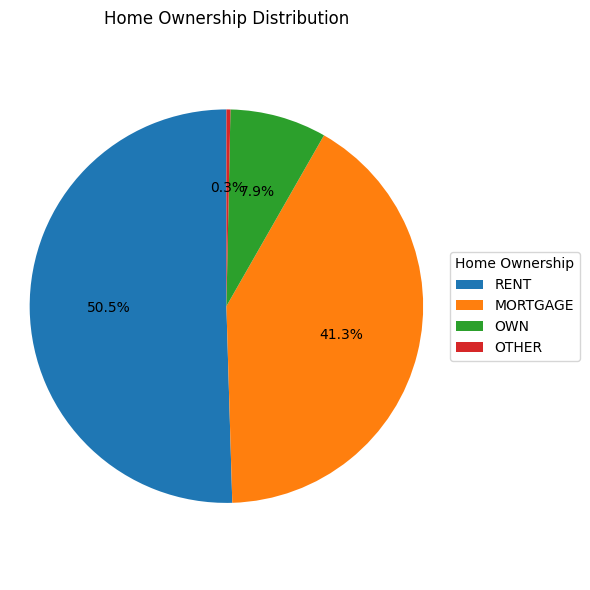

In [126]:
import matplotlib.pyplot as plt

# Calculate distribution
counts = data['person_home_ownership'].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=90
)


ax.legend(
    wedges,
    counts.index,
    title='Home Ownership',
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1)
)

ax.set_title('Home Ownership Distribution')
ax.axis('equal')
plt.tight_layout()
plt.show()


###  What is the distibution of house ownership across different age group?

Across all age groups, the most common home-ownership status is renting

<ipython-input-127-bf28602fdaed>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_group', 'person_home_ownership'])


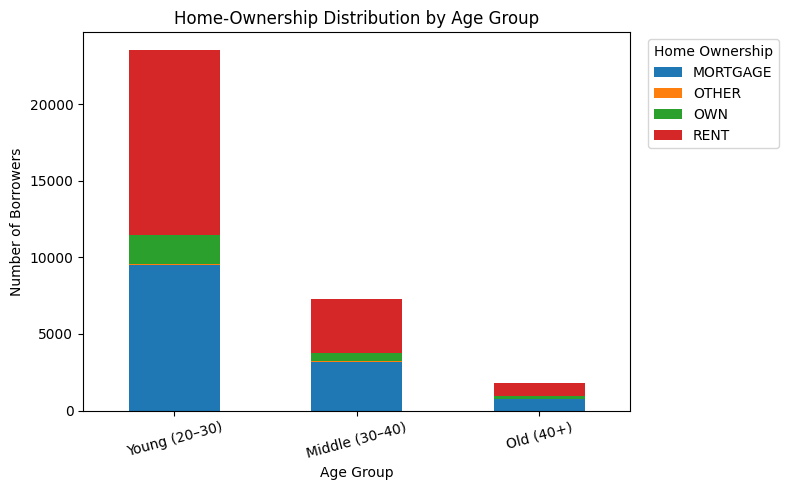

Most Common Home-Ownership by Age Group:
 - Young (20–30): RENT
 - Middle (30–40): RENT
 - Old (40+): RENT


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




# Count home-ownership by age group
ownership_by_age = (
    data
    .groupby(['age_group', 'person_home_ownership'])
    .size()
    .unstack(fill_value=0)
)

# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ownership_by_age.plot(kind='bar', stacked=True, ax=ax)


ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Borrowers')
ax.set_title('Home-Ownership Distribution by Age Group')
ax.legend(title='Home Ownership', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

most_common = ownership_by_age.idxmax(axis=1)


print("Most Common Home-Ownership by Age Group:")
for group, ownership in most_common.items():
    print(f" - {group}: {ownership}")


### How do loan outcomes (default vs. full repayment) vary for each home-ownership category

Renters account for the largest share of loan defaults, most borrowers who default hold a rental housing status

Loan outcomes by ownership status:
 Loan Status     Repaid  Default
Home Ownership                 
MORTGAGE         11754     1690
OTHER               74       33
OWN               2391      193
RENT             11254     5192 



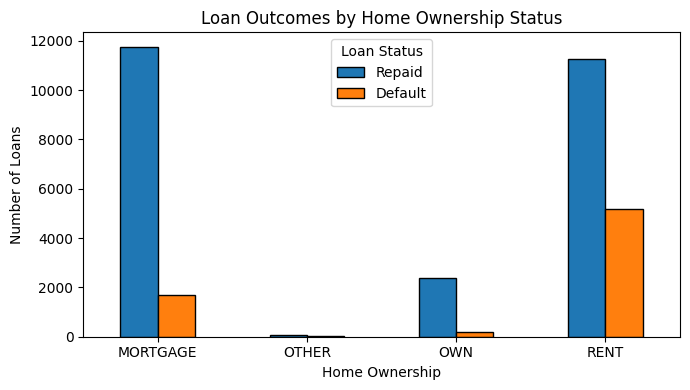

Share of all defaults by home-ownership status:
Home Ownership
MORTGAGE    23.8
OTHER        0.5
OWN          2.7
RENT        73.0
Name: Default, dtype: float64


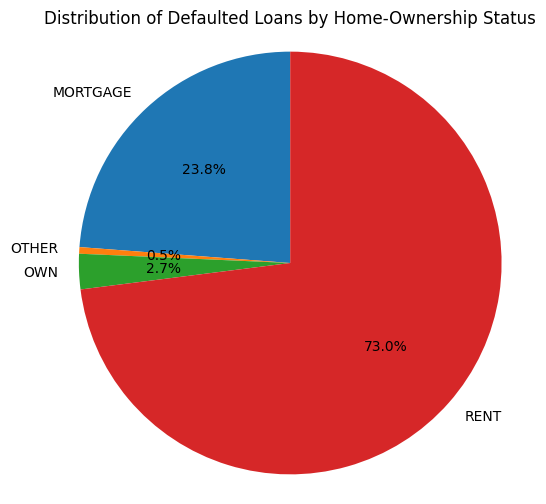

In [128]:
import pandas as pd
import matplotlib.pyplot as plt


own_outcomes = pd.crosstab(
    data['person_home_ownership'],
    data['loan_status'],
    rownames=['Home Ownership'],
    colnames=['Loan Status']
).rename(columns={0: 'Repaid', 1: 'Default'})
print("Loan outcomes by ownership status:\n", own_outcomes, "\n")


fig, ax = plt.subplots(figsize=(7,4))
own_outcomes.plot(
    kind='bar',
    ax=ax,
    edgecolor='black'
)
ax.set_ylabel('Number of Loans')
ax.set_title('Loan Outcomes by Home Ownership Status')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()





default_counts = own_outcomes['Default']
total_defaults = default_counts.sum()
default_share = (default_counts / total_defaults * 100).round(1)

# 3. Print the percentages
print("Share of all defaults by home-ownership status:")
print(default_share)

# 4. Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    default_share,
    labels=default_share.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Defaulted Loans by Home-Ownership Status')
plt.axis('equal')
plt.show()

## Income



*   Distribution of income
*   What is the relationship between home-ownership status and income brackets?


*   What is the relationship between age group and income brackets?
*   What is the most common loan intention among each income category?







### Distribution of income

Most people are categorized into the Middle (40 000–60 000) income class, indicating that the majority of borrowers earn between $40 000 and $60 000 per year.

In [129]:
data['person_income'].describe()

,person_income
count,3.258100e+04
mean,6.607485e+04
std,6.198312e+04
min,4.000000e+03
25%,3.850000e+04
50%,5.500000e+04
75%,7.920000e+04
max,6.000000e+06


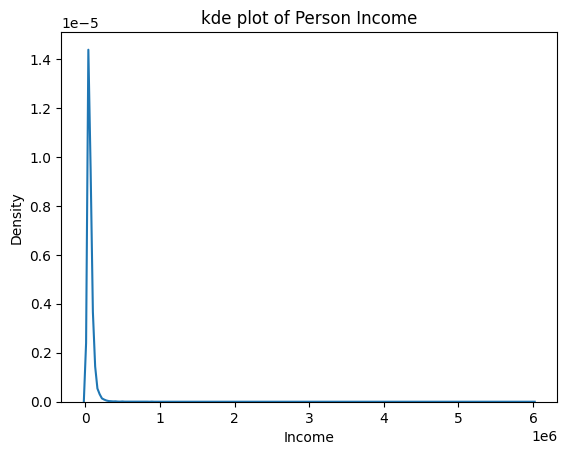

In [130]:
sns.kdeplot(x='person_income',data=data)
plt.title('kde plot of Person Income')
plt.xlabel('Income')

plt.show()

income_class
Poor (<40k)         8620
Middle (40–60k)     9060
Rich (60–80k)       6803
Very Rich (>80k)    8098
Name: count, dtype: int64


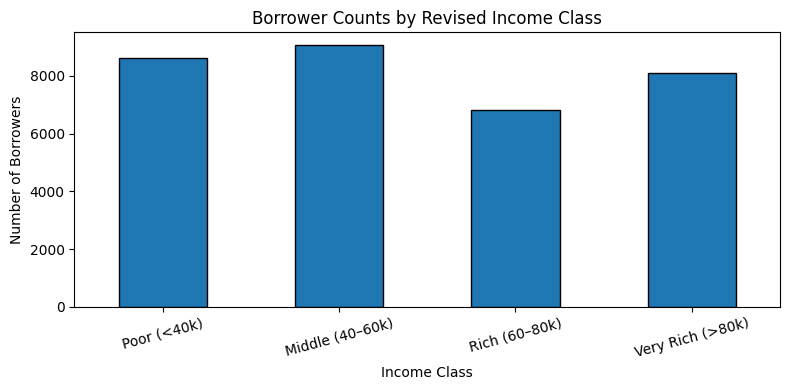

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Define new annual‐income bins and labels
bins   = [0, 40000, 60000, 80000, np.inf]
labels = ['Poor (<40k)', 'Middle (40–60k)', 'Rich (60–80k)', 'Very Rich (>80k)']
data['income_class'] = pd.cut(data['person_income'], bins=bins, labels=labels, right=False)

# Count how many borrowers in each class
class_counts = data['income_class'].value_counts().sort_index()
print(class_counts)


fig, ax = plt.subplots(figsize=(8, 4))
class_counts.plot(kind='bar', edgecolor='black', ax=ax)
ax.set_xlabel('Income Class')
ax.set_ylabel('Number of Borrowers')
ax.set_title('Borrower Counts by Revised Income Class')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### What is the relationship between home-ownership status and income brackets?

Most borrowers in the Poor and Middle income classes are renters, while those in the Rich and Very Rich classes predominantly hold mortgages.

Raw counts:
 person_home_ownership  MORTGAGE  OTHER  OWN  RENT
income_class                                     
Poor (<40k)                1715     24  999  5882
Middle (40–60k)            3296     30  697  5037
Rich (60–80k)              3309     25  421  3048
Very Rich (>80k)           5124     28  467  2479 

Row‐percentages:
 person_home_ownership  MORTGAGE  OTHER   OWN  RENT
income_class                                      
Poor (<40k)                19.9    0.3  11.6  68.2
Middle (40–60k)            36.4    0.3   7.7  55.6
Rich (60–80k)              48.6    0.4   6.2  44.8
Very Rich (>80k)           63.3    0.3   5.8  30.6 



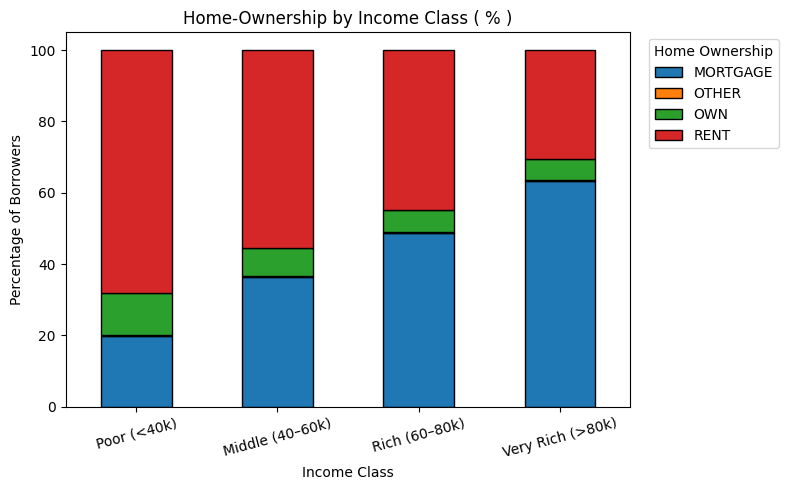

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Crosstab counts and row‐percentages
ownership_vs_income = pd.crosstab(
    data['income_class'],
    data['person_home_ownership']
)
ownership_vs_income_pct = ownership_vs_income.div(ownership_vs_income.sum(axis=1), axis=0).mul(100).round(1)

# 2. Print the tables
print("Raw counts:\n", ownership_vs_income, "\n")
print("Row‐percentages:\n", ownership_vs_income_pct, "\n")

# 3. Stacked‐bar chart of percentages
ownership_vs_income_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    edgecolor='black'
)
plt.xlabel('Income Class')
plt.ylabel('Percentage of Borrowers')
plt.title('Home-Ownership by Income Class ( % )')
plt.legend(title='Home Ownership', bbox_to_anchor=(1.02,1), loc='upper left')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### What is the relationship between age group and income brackets?

In [133]:
import pandas as pd
import matplotlib.pyplot as plt


age_income_ct = pd.crosstab(data['age_group'], data['income_class'])


age_income_pct = age_income_ct.div(age_income_ct.sum(axis=1), axis=0).mul(100).round(1)


print("Raw counts:\n", age_income_ct, "\n")
print("Row-percentages:\n", age_income_pct, "\n")





Raw counts:
 income_class    Poor (<40k)  Middle (40–60k)  Rich (60–80k)  Very Rich (>80k)
age_group                                                                    
Young (20–30)          6458             6737           4956              5357
Middle (30–40)         1766             1869           1478              2195
Old (40+)               396              454            369               546 

Row-percentages:
 income_class    Poor (<40k)  Middle (40–60k)  Rich (60–80k)  Very Rich (>80k)
age_group                                                                    
Young (20–30)          27.5             28.7           21.1              22.8
Middle (30–40)         24.2             25.6           20.2              30.0
Old (40+)              22.4             25.7           20.9              30.9 



### How do loan outcomes (default vs. full repayment) vary accross different income class

Raw counts:
 loan_status       Repaid  Default
income_class                     
Poor (<40k)         5197     3423
Middle (40–60k)     7142     1918
Rich (60–80k)       5770     1033
Very Rich (>80k)    7364      734 

Percentages by income class:
 loan_status       Repaid  Default
income_class                     
Poor (<40k)         60.3     39.7
Middle (40–60k)     78.8     21.2
Rich (60–80k)       84.8     15.2
Very Rich (>80k)    90.9      9.1 



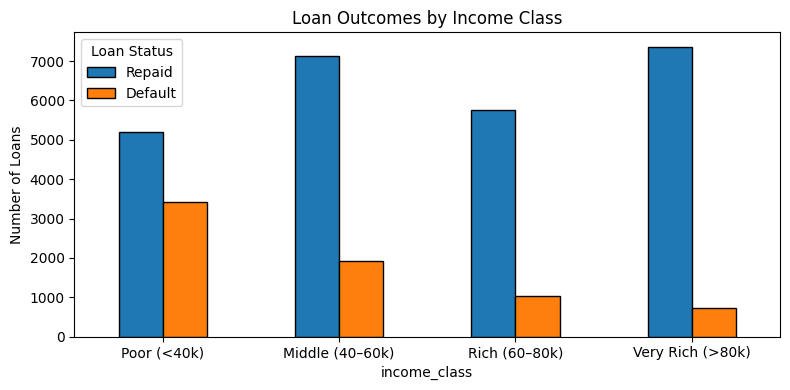

In [134]:
import pandas as pd
import matplotlib.pyplot as plt


income_outcomes = pd.crosstab(
    data['income_class'],
    data['loan_status']
).rename(columns={0: 'Repaid', 1: 'Default'})
print("Raw counts:\n", income_outcomes, "\n")


income_outcome_pct = (
    income_outcomes
    .div(income_outcomes.sum(axis=1), axis=0)
    .mul(100)
    .round(1)
)
print("Percentages by income class:\n", income_outcome_pct, "\n")

# 3. Plot side-by-side bars
fig, ax = plt.subplots(figsize=(8,4))
income_outcomes.plot(
    kind='bar',
    ax=ax,
    edgecolor='black'
)
ax.set_ylabel('Number of Loans')
ax.set_title('Loan Outcomes by Income Class')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Repaid','Default'])
plt.tight_layout()
plt.show()


### The most common loan intention between each income category

In [135]:
# 1. Count loan intents by income class
intent_counts = data.groupby(['income_class','loan_intent']).size().unstack(fill_value=0)

# 2. Identify the most frequent intent in each class
most_common_intent = intent_counts.idxmax(axis=1)

# 3. Display the full table and the winners
print("Loan Intent Counts by Income Class:\n", intent_counts, "\n")
print("Most Common Loan Intent per Income Class:\n", most_common_intent)


Loan Intent Counts by Income Class:
 loan_intent       DEBTCONSOLIDATION  EDUCATION  HOMEIMPROVEMENT  MEDICAL  \
income_class                                                               
Poor (<40k)                    1392       1689              707     1894   
Middle (40–60k)                1449       1849              853     1837   
Rich (60–80k)                  1086       1383              878     1129   
Very Rich (>80k)               1285       1532             1167     1211   

loan_intent       PERSONAL  VENTURE  
income_class                         
Poor (<40k)           1440     1498  
Middle (40–60k)       1512     1560  
Rich (60–80k)         1145     1182  
Very Rich (>80k)      1424     1479   

Most Common Loan Intent per Income Class:
 income_class
Poor (<40k)           MEDICAL
Middle (40–60k)     EDUCATION
Rich (60–80k)       EDUCATION
Very Rich (>80k)    EDUCATION
dtype: object


<ipython-input-135-f3cfe244e9d0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  intent_counts = data.groupby(['income_class','loan_intent']).size().unstack(fill_value=0)


## Loan intention

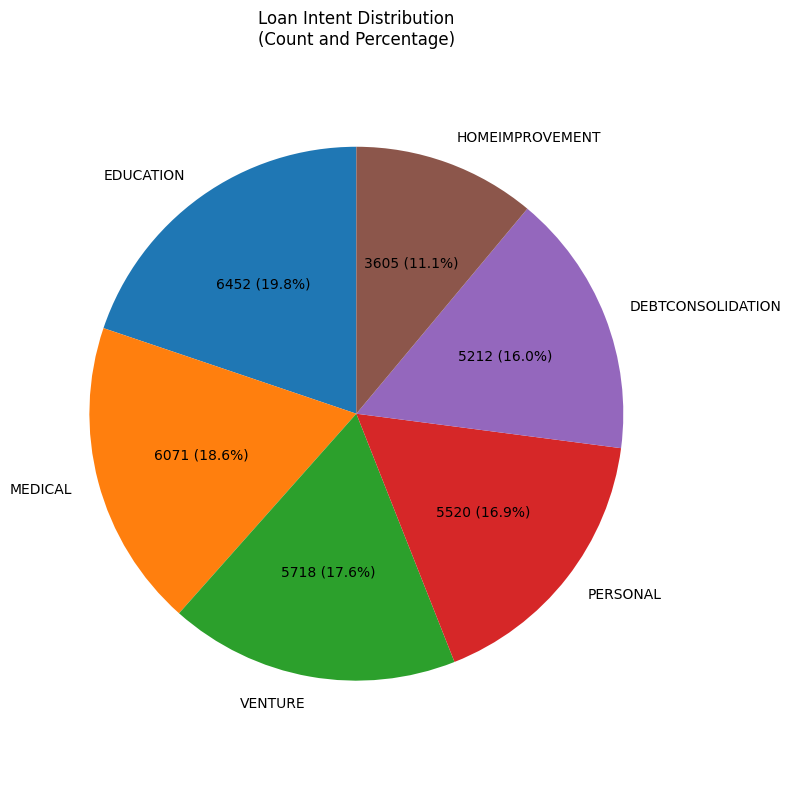

In [136]:
import matplotlib.pyplot as plt


intent_counts = data['loan_intent'].value_counts()
labels = intent_counts.index
sizes = intent_counts.values

# Plot pie chart with counts and percentages
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f"{int(pct/100.*sizes.sum())} ({pct:.1f}%)",
    startangle=90
)

ax.set_title('Loan Intent Distribution\n(Count and Percentage)')
plt.axis('equal')
plt.tight_layout()
plt.show()


## Loan Amount

<ipython-input-137-9188c22f8eb5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y="loan_amnt", data=data, palette="coolwarm")


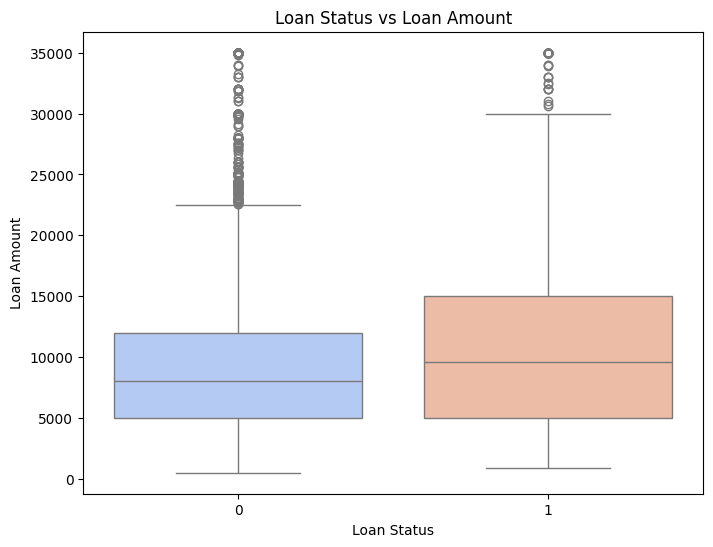

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(x="loan_status", y="loan_amnt", data=data, palette="coolwarm")
plt.title('Loan Status vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

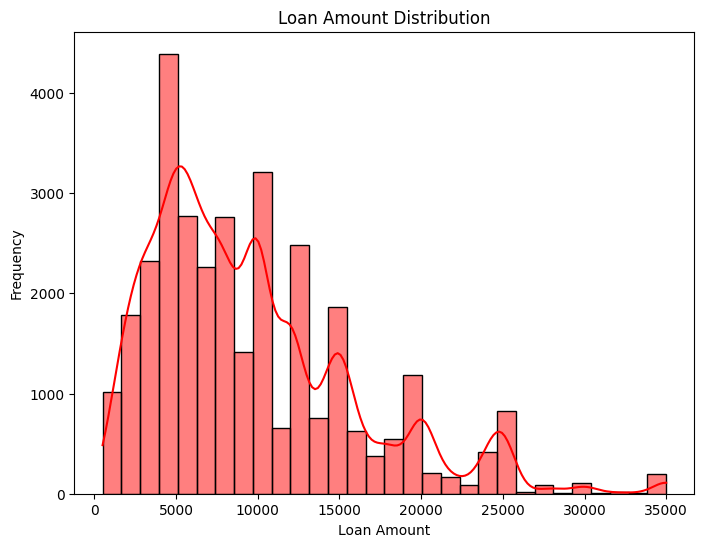

In [138]:
plt.figure(figsize=(8,6))
sns.histplot(data['loan_amnt'], bins=30, kde=True, color="red")
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

## Correlation analysis

In [139]:
numerical_col = data.select_dtypes(include=['int64','float64']).columns
categorical_col = data.select_dtypes(include=['object','bool']).columns
print(numerical_col)
print(categorical_col)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')
Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [140]:
data.drop(columns= data.select_dtypes(include = 'category').columns, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


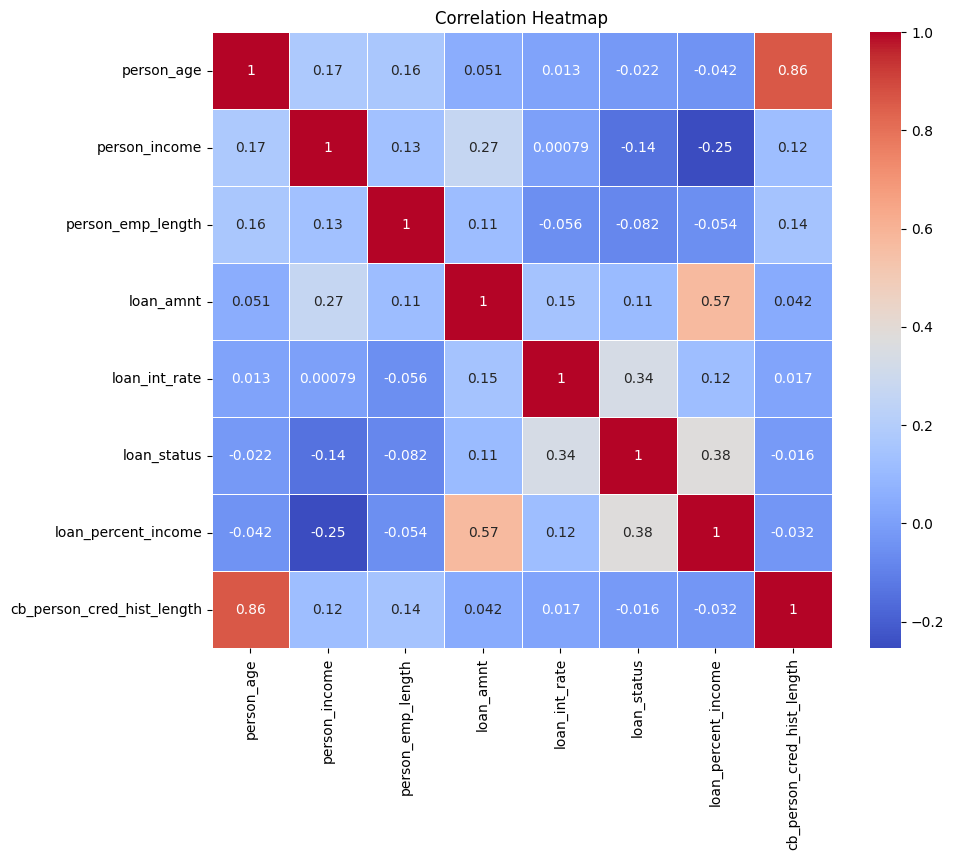

In [141]:
corr = data[numerical_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [142]:
#features with low correlation to the lean_status (target)
corr[(corr["loan_status"] < 0.05) & (corr["loan_status"] > -0.05)].index

Index(['person_age', 'cb_person_cred_hist_length'], dtype='object')

##Summary

**Contextual Findings Report**

- **Age Profile**  
  - The borrowers’ **average age** is **27**, with those **over 40** treated as statistical outliers.  

- **Loan Purpose by Age Group**  
  - **Young (20–30)**: Most frequently take out **Education** loans.  
  - **Middle (30–40)**: Predominantly request **Medical** loans.  
  - **Old (40+)**: Primarily use **Personal** loans.  

- **Home-Ownership Overview**  
  - Across **all age groups**, **renting** is the dominant status—more borrowers rent than own or carry a mortgage.  

- **Default Risk by Housing Status**  
  - **Renters** contribute the largest share of all loan defaults, highlighting elevated risk in the rental segment.  

- **Income Distribution & Segments**  
  - A plurality of borrowers fall into the **Middle income class** (\$40 000–\$60 000).  
  - Income classes were defined as:  
    - **Poor**: < \$40 000  
    - **Middle**: \$40 000–\$60 000  
    - **Rich**: \$60 000–\$80 000  
    - **Very Rich**: ≥ \$80 000  

- **Home-Ownership by Income Class**  
  - **Poor & Middle** earners are overwhelmingly **renters** (> 55 %).  
  - **Rich & Very Rich** segments shift toward **mortgage-holding** (> 48 % and > 63 %, respectively).  

- **Repayment Performance by Income**  
  - Default rates decrease with rising income:  
    - **Poor** (<\$40 k): 39.7 % default  
    - **Middle** (\$40–60 k): 21.2 % default  
    - **Rich** (\$60–80 k): 15.2 % default  
    - **Very Rich** (≥\$80 k):  9.1 % default  

- **Loan Purpose by Income Class**  
  - **Poor** borrowers most often take **Medical** loans.  
  - In **Middle**, **Rich**, and **Very Rich** brackets, **Education** is the single most common loan intent.  



# Data Preprocessing

In [143]:
data.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


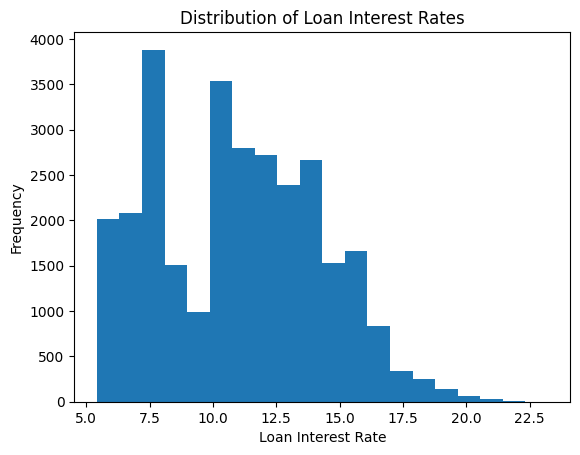

,loan_int_rate
count,29465.000000
mean,11.011695
std,3.240459
min,5.420000
25%,7.900000
50%,10.990000
75%,13.470000
max,23.220000


In [144]:
#because the relatively high corr between loan_status and loan_int_rate, we use imputation to fill na values

plt.hist(data['loan_int_rate'], bins=20)
plt.xlabel('Loan Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Interest Rates')
plt.show()

data['loan_int_rate'].describe()

In [145]:
#handling missing values
data.fillna(data['loan_int_rate'].mean(), inplace=True)
data['person_emp_length'].dropna(inplace=True)
data.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [146]:
data['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [147]:
# from sklearn.preprocessing import OneHotEncoder

# grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
# data['loan_grade'] = data['loan_grade'].map(grade_map)

# # 2. Binary maps
# data['loan_status'] = data['loan_status'].astype(int)  # already 0/1?
# data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'N':0, 'Y':1})



# onehot_cols = ['person_home_ownership', 'loan_intent']
# for col in onehot_cols:
#     enc = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
#     transformed = enc.fit_transform(data[[col]])
#     new_cols = [f"{col}_{cat}" for cat in enc.categories_[0][1:]]  # since you dropped the first
#     df_ohe = pd.DataFrame(transformed, columns=new_cols, index=data.index)
#     data = pd.concat([data, df_ohe], axis=1)
#     data.drop(columns=[col], inplace=True)


In [148]:
from sklearn.preprocessing import OneHotEncoder

# grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
# data['loan_grade'] = data['loan_grade'].map(grade_map)

# 2. Binary maps
data['loan_status'] = data['loan_status'].astype(int)  # already 0/1?
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'N':0, 'Y':1})



onehot_cols = ['person_home_ownership', 'loan_intent','loan_grade']
for col in onehot_cols:
    enc = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    transformed = enc.fit_transform(data[[col]])
    new_cols = [f"{col}_{cat}" for cat in enc.categories_[0][1:]]  # since you dropped the first
    df_ohe = pd.DataFrame(transformed, columns=new_cols, index=data.index)
    data = pd.concat([data, df_ohe], axis=1)
    data.drop(columns=[col], inplace=True)


In [149]:
data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,0,30,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32577,54,120000,4.0,17625,7.49,0,0.15,0,19,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32578,65,76000,3.0,35000,10.99,1,0.46,0,28,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32579,56,150000,5.0,15000,11.48,0,0.10,0,26,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32581 non-null  int64  
 1   person_income                32581 non-null  int64  
 2   person_emp_length            32581 non-null  float64
 3   loan_amnt                    32581 non-null  int64  
 4   loan_int_rate                32581 non-null  float64
 5   loan_status                  32581 non-null  int64  
 6   loan_percent_income          32581 non-null  float64
 7   cb_person_default_on_file    32581 non-null  int64  
 8   cb_person_cred_hist_length   32581 non-null  int64  
 9   person_home_ownership_OTHER  32581 non-null  float64
 10  person_home_ownership_OWN    32581 non-null  float64
 11  person_home_ownership_RENT   32581 non-null  float64
 12  loan_intent_EDUCATION        32581 non-null  float64
 13  loan_intent_HOME

In [151]:
numerical_col = numerical_col.drop('loan_status')

In [152]:
numerical_col

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [153]:
# Scaling numerical columns \: we use MinMax to have bounded values between zero and one
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

def preprocessing(df, numerical_col, bounded=True):
    """
    Scale numeric features and split dataset into training and test sets.

    Parameters
    ----------
    data : pandas.DataFrame
        The full dataset, including the target column `'loan_status'`.
    numerical_col : list of str
        List of column names in `data` that should be scaled.
    bounded : bool, default=True
        - If True, apply Min–Max scaling so each feature is in [0, 1].
        - If False, apply standard scaling (zero mean, unit variance).

    Returns
    -------
    X_train, X_test, y_train, y_test

    """
    df = df.copy()
    if bounded:
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df[numerical_col] = scaler.fit_transform(df[numerical_col])

    X = df.drop(columns=['loan_status'])
    y = df['loan_status']


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    return X_train, X_test, y_train, y_test



In [154]:
loan_status_counts = (
    data
    .groupby('loan_status')
    .size()
    .reset_index(name='count')
)
print(loan_status_counts)


   loan_status  count
0            0  25473
1            1   7108


# Baseline Model

## Logistic Regression

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = preprocessing(data, numerical_col, bounded = False)

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



X_train


Accuracy: 0.8623599815866196
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      5072
           1       0.76      0.55      0.64      1445

    accuracy                           0.86      6517
   macro avg       0.82      0.75      0.78      6517
weighted avg       0.86      0.86      0.85      6517

Confusion Matrix:
 [[4829  243]
 [ 654  791]]


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
32377,5.712903,-0.323881,-0.703240,-0.757573,2.541089e-02,-0.657458,1,4.487315,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1338,-0.273252,-0.646554,-1.178305,-0.172315,1.764791e+00,1.496501,0,-0.691554,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7047,-0.745843,-0.243213,-0.465707,1.014021,6.809236e-01,1.309200,1,-0.691554,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8225,-0.903374,-0.162480,0.246890,-0.567760,-1.016270e+00,-0.563808,0,-0.444942,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7178,-0.588313,0.208530,-0.465707,-0.409582,4.959522e-01,-0.751109,0,-0.691554,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,1.774643,-0.444884,0.484423,-0.963205,9.632484e-01,-0.751109,1,2.761025,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5390,-0.430783,0.047193,0.009358,-0.172315,-1.327801e+00,-0.470158,0,-0.444942,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,-0.273252,1.321754,-0.940772,1.646733,2.264539e+00,-0.282857,0,-0.691554,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15795,-0.273252,1.757363,-1.178305,0.855843,-5.764478e-16,-0.751109,0,-0.691554,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## RandomForest Classifier

In [156]:
# Analyzing the effectiveness of each feature to our target value prediction
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



importances = rf.feature_importances_

feat_imp = pd.Series(importances, index=X_train.columns)

feat_imp_sorted = feat_imp.sort_values(ascending=False)

print("Feature Importances (highest first):")
print(feat_imp_sorted)


print("\nTop 10 features:")
print(feat_imp_sorted.head(10))

Accuracy: 0.9291084854994629
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.94      0.72      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517

Confusion Matrix:
 [[5011   61]
 [ 401 1044]]
Feature Importances (highest first):
loan_percent_income            0.224964
person_income                  0.148262
loan_int_rate                  0.124964
person_home_ownership_RENT     0.077126
loan_amnt                      0.076709
person_emp_length              0.061363
loan_grade_D                   0.054892
person_age                     0.049042
cb_person_cred_hist_length     0.037584
person_home_ownership_OWN      0.017464
loan_intent_MEDICAL            0.016374
loan_grade_C                   0.016353
loan_intent_EDUCATION          0.015871
loan_intent_HOMEI

# Experiments

1. **Removing Outliers**  
   - Identified the most predictive features for the target variable.  
   - Analyzed feature distributions and detected outliers.  
   - Filtered the dataset to remove outlier observations.  
   - Reran the baseline models—achieving a 10 % performance improvement.  

2. **Removing Less Effective Features**  
   - Dropped the columns `cb_person_default_on_file`, `loan_grade_B`, `loan_grade_F`, and `loan_grade_G`.  
   - Observed no significant change in model performance.




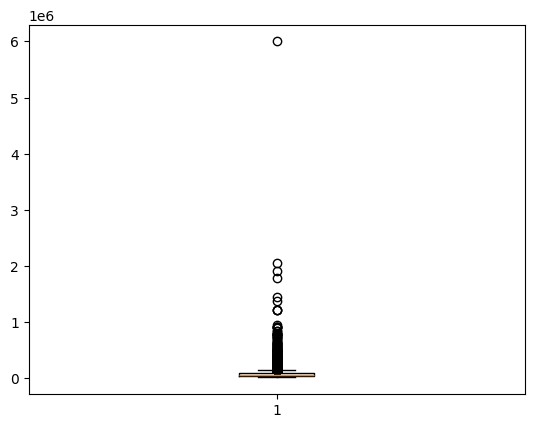

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
17833,32,1200000,1.0,12000,7.510000,0,0.01,0,8,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29119,36,1200000,16.0,10000,6.540000,0,0.01,0,11,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29120,40,1200000,1.0,10000,11.011695,0,0.01,0,16,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30049,42,2039784,0.0,8450,12.290000,0,0.00,1,15,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
31922,47,1362000,9.0,6600,7.740000,0,0.00,0,17,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31924,44,1440000,7.0,6400,7.400000,0,0.00,0,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32297,144,6000000,12.0,5000,12.730000,0,0.00,0,25,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32497,63,1782000,13.0,12025,14.270000,0,0.01,0,30,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32546,60,1900000,5.0,1500,11.011695,0,0.00,0,21,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
plt.boxplot(data['person_income'])
plt.show()


data[data['person_income']> 1000000]

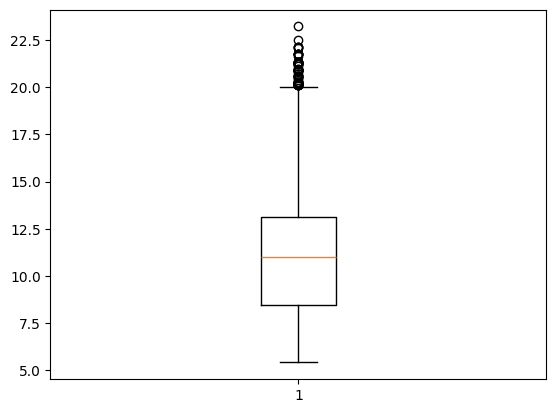

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
17,23,92111,7.0,35000,20.25,1,0.32,0,4,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
448,26,103872,6.0,24000,20.03,1,0.23,0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
451,26,108000,9.0,24000,20.16,1,0.22,0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
457,23,114750,2.0,24000,20.03,1,0.18,1,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
523,23,56000,8.0,21600,21.21,1,0.39,1,4,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29305,50,44000,14.0,20000,20.40,1,0.45,0,11,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29495,42,20400,4.0,2000,20.99,0,0.10,1,13,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31452,37,71400,7.0,3100,20.69,1,0.04,1,14,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31853,42,153000,7.0,25000,20.53,1,0.16,0,14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [158]:
plt.boxplot(data['loan_int_rate'])
plt.show()
data[data['loan_int_rate']> 20]

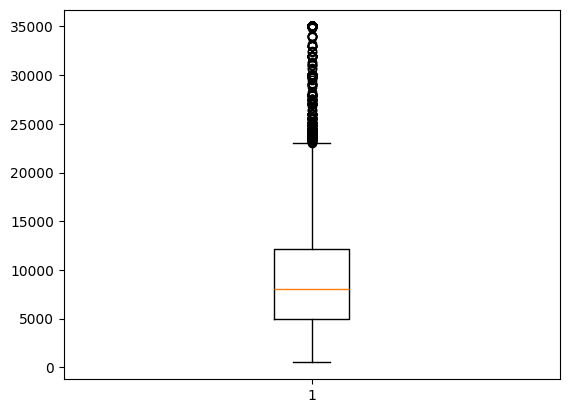

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,26,77100,8.0,35000,12.42,1,0.45,0,3,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,24,78956,5.0,35000,11.11,1,0.44,0,4,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32524,51,120000,2.0,30000,7.90,0,0.25,0,22,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32539,61,148000,30.0,24000,10.38,1,0.16,0,20,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32541,52,163000,9.0,25000,14.11,1,0.15,0,30,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32562,61,160000,30.0,24000,10.38,0,0.15,0,21,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [159]:
plt.boxplot(data['loan_amnt'])
plt.show()
data[data['loan_amnt']> 23000]

In [160]:
from sklearn.preprocessing import StandardScaler


data_2 = data.copy()

# 1) Drop borrowers with income > 1,000,000
data_2 = data_2[data_2['person_income'] <= 1000000]

# 2) From that, drop loans with interest rate > 20%
data_2 = data_2[data_2['loan_int_rate'] <= 20]

# 3) Finally, drop loans with amount > 23,000
data_2 = data_2[data_2['loan_amnt'] <= 23000]

print("Original data shape:", data.shape)
print("Filtered data shape:", data_2.shape)

X_train, X_test, y_train, y_test = preprocessing(data_2, numerical_col, bounded = False)

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Original data shape: (32581, 23)
Filtered data shape: (30828, 23)
Accuracy: 0.8734998378203049
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      4890
           1       0.77      0.55      0.64      1276

    accuracy                           0.87      6166
   macro avg       0.83      0.75      0.78      6166
weighted avg       0.87      0.87      0.87      6166

Confusion Matrix:
 [[4681  209]
 [ 571  705]]


In [161]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9343172234836199
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4890
           1       0.96      0.71      0.82      1276

    accuracy                           0.93      6166
   macro avg       0.95      0.85      0.89      6166
weighted avg       0.94      0.93      0.93      6166

Confusion Matrix:
 [[4855   35]
 [ 370  906]]


In [162]:
# List of columns to remove
cols_to_drop = [
    'cb_person_default_on_file',
    'loan_grade_B',
    'loan_grade_F',
    'loan_grade_G',

]

# Drop them from your DataFrame in-place
data_3 = data_2.drop(columns=cols_to_drop)

# (Optional) verify
print("Remaining columns:", data_3.columns.tolist())



X_train, X_test, y_train, y_test = preprocessing(data_3, numerical_col, bounded = False)

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Remaining columns: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E']
Accuracy: 0.8696075251378528
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      4890
           1       0.76      0.54      0.63      1276

    accuracy                           0.87      6166
   macro avg       0.82      0.75      0.78      6166
weighted avg       0.86      0.87      0.86      6166

Confusion Matrix:
 [[4675  215]
 [ 589  687]]
Accuracy: 0.9349659422640285
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.9

# Models

In [163]:
!pip install xgboost
!pip install catboost

In [164]:
!pip install lightgbm

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report
import pandas as pd


X_train, X_test, y_train, y_test = preprocessing(data_2, numerical_col, bounded=False)
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42,
    ),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42, n_jobs=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}

# 2. Train and evaluate
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Probabilities for log loss
    train_probs = model.predict_proba(X_train)
    test_probs  = model.predict_proba(X_test)

    # Metrics
    train_loss    = log_loss(y_train, train_probs)
    test_loss     = log_loss(y_test,  test_probs)
    train_acc     = accuracy_score(y_train, model.predict(X_train))
    test_acc      = accuracy_score(y_test,  model.predict(X_test))
    report        = classification_report(y_test, model.predict(X_test), output_dict=True)
    precision     = report["weighted avg"]["precision"]
    recall        = report["weighted avg"]["recall"]
    f1_score      = report["weighted avg"]["f1-score"]

    # Store
    results[name] = {
        "Train Loss":    train_loss,
        "Test Loss":     test_loss,
        "Train Acc":     train_acc,
        "Test Acc":      test_acc,
        "Precision":     precision,
        "Recall":        recall,
        "F1-Score":      f1_score
    }

    # Print
    print(f"  Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    print(f"  Train Acc:  {train_acc:.4f}, Test Acc:  {test_acc:.4f}")
    print(f"  Precision:  {precision:.4f}, Recall: {recall:.4f}, F1: {f1_score:.4f}")
    print("-" * 50)

# 3. Summary table
results_df = pd.DataFrame(results).T
print("\nSummary of All Models:")
print(results_df.sort_values(by="Test Acc", ascending=False))

ModuleNotFoundError: No module named 'catboost'